In [1]:
import math
import numpy as np
from numpy import genfromtxt
import operator
import random
import matplotlib.pyplot as plt

In [2]:
# Import X and y from csv file
def read_logistic_data(filename):
    my_data = genfromtxt(filename, delimiter=';')
    X = []
    y= []
    for i in range(len(my_data)):
        new_data = my_data[i]
        y.append([new_data[-1]])
        X.append(np.delete(new_data, -1))
    return X, y

X_train, y_train = read_logistic_data('digits123-1.csv')
X_test, y_test = read_logistic_data('digits123-2.csv')

### Question 1: k-means clustering

In [205]:
def random_means(k, X):
    initialWeight = []R
    for i in range(k):
        rand_x = int(random.uniform(0, len(X)-1))
        initialWeight.append(X[rand_x])
                
    return initialWeight

In [357]:
# finds best initialization of means by finding lowest cost value for 25 pairs of means.
def best_rnd_means(k, X):
    lowest_cost = 9999
    for i in range(25):
        rand_means = random_means(k, X)
        means, clusters = KMeans(X, k, 15, rand_means)
        cost = J(means, clusters, X)
        
        if cost < lowest_cost:
            lowest_cost = cost
            best_rnd_means = rand_means

    return best_rnd_means

In [274]:
def KMeans(X, k, iterations, means):    
    for i in range(iterations):
        # Initialize lists to store assigned values in clusters
        clusters = list()
        for i in range(len(means)):
            clusters.append([])

        # Assign all training examples to a cluster
        for i in range(len(X)):
            distance = 9999
            for j in range(len(means)):
                euclidean = math.sqrt(sum((X[i]-means[j])**2))
                # Find the cluster with smallest euclidean distance
                if euclidean < distance:
                    result = j
                    distance = euclidean
            clusters[result].append(i)
        
        # Update cluster means
        for i in range(len(clusters)):
            mean_sum = 0
            for x in clusters[i]:
                mean_sum += X[x]
            if (len(clusters[i]) > 0):
                mean_sum = mean_sum / len(clusters[i])  
            means[i] = mean_sum
 
    return means, clusters

In [ ]:
def J(means, clusters, X):
    cost_sum = 0
    cluster_means = []    
    for i in range(len(clusters)):
        for x in clusters[i]:
            cost_sum += sum((X[x]-means[i])**2)
    
    return cost_sum / len(X)

In [360]:
# Example run: random means initialization (pick random mean that has lowest cost)
means = best_rnd_means(3, X_train)
means, clusters = KMeans(X_train, k, 15, rand_means)

np.set_printoptions(precision=2, suppress=True)

print 'Total cost: ', J(means, clusters, X_train)
for i in range(len(means)):
    print means[i]
    print 'Number of training examples assigned to mean: ', len(clusters[i])
    print '-------------------------------------------------------------------------'

Total cost:  698.825305208
[  0.     0.42   7.4   13.09  13.88   8.56   0.9    0.     0.02   3.68
  11.13   8.81  11.11  12.95   2.11   0.02   0.01   2.16   4.22   4.53
  11.09  11.01   1.22   0.     0.     0.7    2.43   8.17  12.51   7.75
   0.52   0.     0.     0.18   1.14   4.35  11.13  11.74   2.07   0.     0.
   0.45   1.47   1.29   5.95  11.57   5.32   0.01   0.     0.91   6.37
   5.3    8.42  13.3    6.25   0.27   0.     0.3    8.02  13.43  14.16
  10.57   2.84   0.64]
Number of training examples assigned to mean:  129
-------------------------------------------------------------------------
[  0.     0.06   2.99  12.78  12.3    4.05   0.57   0.01   0.     0.4
   5.64  14.75  15.23   6.94   0.77   0.01   0.03   1.12   6.56  14.71
  15.23   5.91   0.23   0.     0.01   1.57   7.49  15.01  14.49   3.84
   0.05   0.     0.     0.7    7.14  14.83  13.61   2.69   0.01   0.     0.
   0.43   7.25  14.78  13.57   2.32   0.     0.     0.     0.18   5.97
  14.55  13.34   3.13   0.09   0.  

In [361]:
# Example run: handselected values for mean.
means, clusters = KMeans(X_train, 3, 15, [X_train[0], X_train[150], X_train[299]])

print 'Total cost: ', J(means, clusters, X_train)
for i in range(len(means)):
    print means[i]
    print 'Number of training examples assigned to mean: ', len(clusters[i])
    print '-------------------------------------------------------------------------'

Total cost:  698.907441236
[  0.     0.09   3.29  12.9   12.44   4.34   0.55   0.01   0.     0.4
   5.78  14.51  15.04   7.26   0.79   0.01   0.03   1.07   6.31  14.29
  15.12   6.19   0.25   0.     0.01   1.51   7.25  14.88  14.53   3.81
   0.05   0.     0.     0.68   6.91  14.79  13.64   2.65   0.01   0.     0.
   0.41   7.04  14.55  13.66   2.45   0.     0.     0.     0.21   5.9
  14.25  13.41   3.17   0.09   0.     0.     0.05   3.58  12.19  12.9
   3.67   0.19   0.  ]
Number of training examples assigned to mean:  80
-------------------------------------------------------------------------
[  0.     1.36  11.82  14.56   7.16   0.96   0.     0.     0.02   5.56
  13.74  12.26  10.99   3.23   0.03   0.     0.     3.79   7.6    6.24
  11.51   3.98   0.03   0.     0.     0.35   1.83   6.28  12.36   3.17   0.
   0.     0.     0.03   0.96   8.71  11.27   1.73   0.     0.     0.     0.16
   3.78  11.3    8.67   2.52   0.88   0.02   0.     1.37  11.45  14.06
  12.71  11.54   8.49   1.01   

### Question 2: optimized k

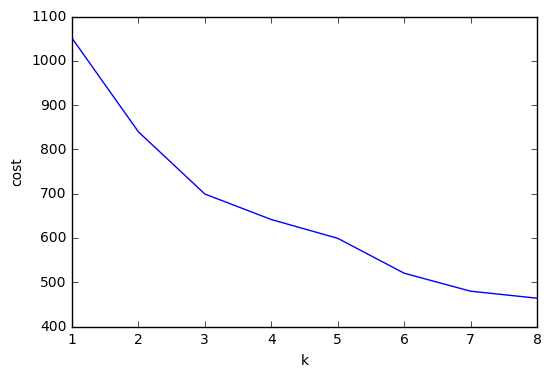

In [310]:
cost = []
k_list = []
rand_means = random_means(9, X_train)
for k in range(1,9):
    means, clusters = KMeans(X_train, k, 15, rand_means[0:k])
    cost.append(J(means, clusters, X_train))
    k_list.append(k)
    
plt.plot(k_list, cost)
plt.ylabel("cost")
plt.xlabel("k")
plt.show()

After applying the elbow method, it becomes clear that 3 is the optimal number for k (as suspected).

In [ ]:
# TODO

# run random mean initialization x times, pick one that results in lowest cost

### Question 3: compare cluster labels to given labels

698.825305208
